C:\Users\Jayashrinidhi V\AppData\Local\Temp\ipykernel_4856\324615800.py:10: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  'date': pd.date_range(start='2000-01', periods=20, freq='Q'),
c:\Users\Jayashrinidhi V\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


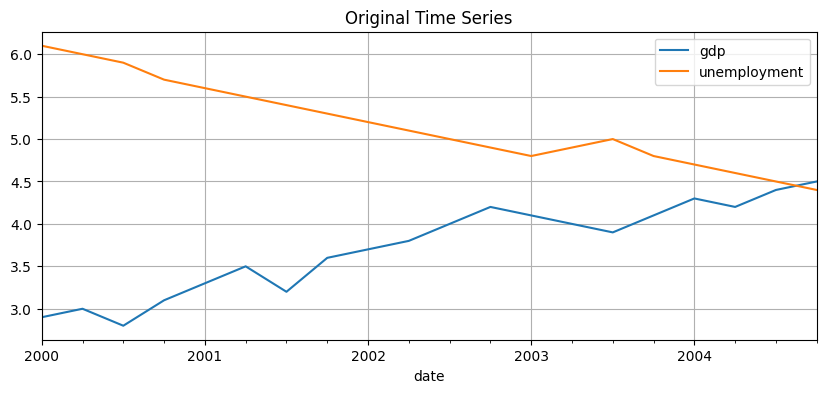

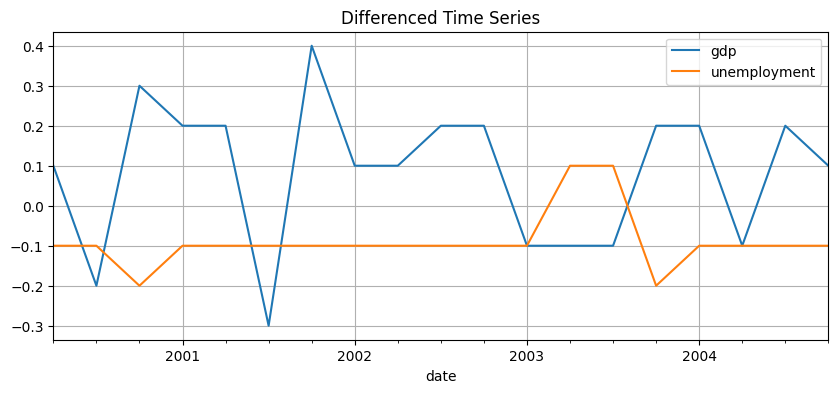

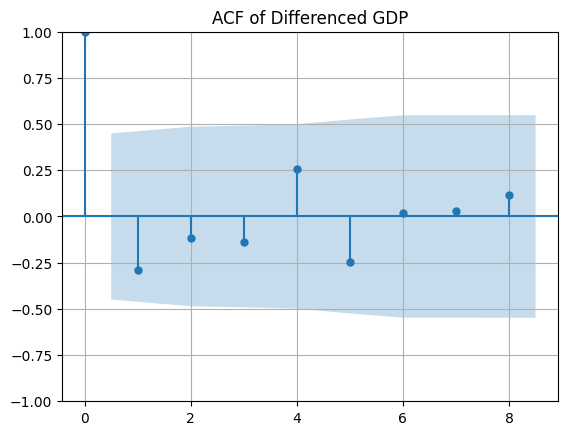

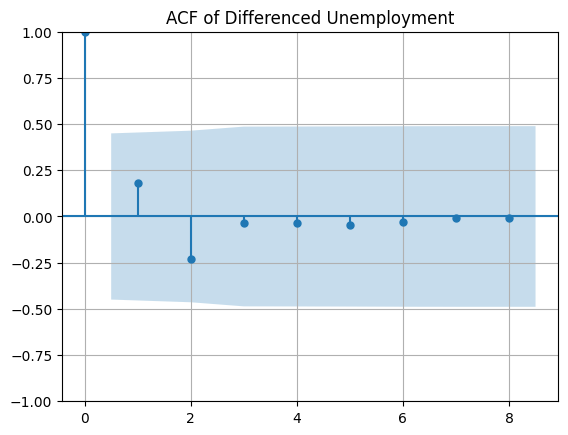

C:\Users\Jayashrinidhi V\AppData\Local\Temp\ipykernel_4856\324615800.py:62: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  forecast_index = pd.date_range(start=df.index[-1], periods=5, freq='Q')[1:]


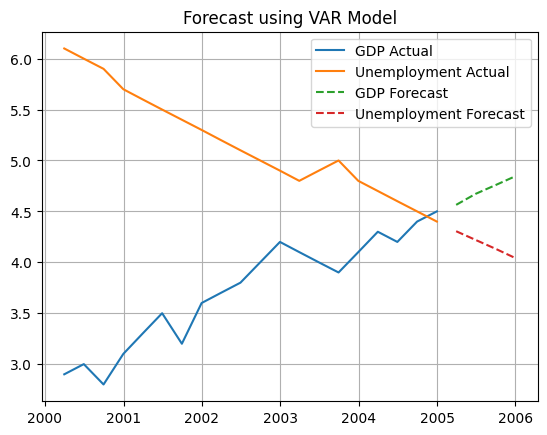

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

# 1. Sample Dataset (20 quarters of GDP & Unemployment)
data = {
    'date': pd.date_range(start='2000-01', periods=20, freq='Q'),
    'gdp': [2.9, 3.0, 2.8, 3.1, 3.3, 3.5, 3.2, 3.6, 3.7, 3.8,
            4.0, 4.2, 4.1, 4.0, 3.9, 4.1, 4.3, 4.2, 4.4, 4.5],
    'unemployment': [6.1, 6.0, 5.9, 5.7, 5.6, 5.5, 5.4, 5.3, 5.2, 5.1,
                     5.0, 4.9, 4.8, 4.9, 5.0, 4.8, 4.7, 4.6, 4.5, 4.4]
}
df = pd.DataFrame(data).set_index('date')

# 2. Difference to make stationary
df_diff = df.diff().dropna()

# 3. Fit VAR Model with safe lag
model = VAR(df_diff)
results = model.fit(maxlags=2)
k_ar = results.k_ar

# 4. Forecast
forecast_input = df_diff.values[-k_ar:]
forecast = results.forecast(y=forecast_input, steps=4)
forecast_df = pd.DataFrame(forecast, columns=df.columns)

# Inverse transform
last_obs = df.iloc[-1]
forecast_values = forecast_df.cumsum() + last_obs

# 5. PLOTS (5 Total)

# 1. Original Time Series
df.plot(title='Original Time Series', figsize=(10, 4))
plt.grid(True)
plt.show()

# 2. Differenced Time Series
df_diff.plot(title='Differenced Time Series', figsize=(10, 4))
plt.grid(True)
plt.show()

# 3. ACF Plot - GDP
plot_acf(df_diff['gdp'], lags=8)
plt.title('ACF of Differenced GDP')
plt.grid(True)
plt.show()

# 4. ACF Plot - Unemployment
plot_acf(df_diff['unemployment'], lags=8)
plt.title('ACF of Differenced Unemployment')
plt.grid(True)
plt.show()

# 5. Forecast Plot
plt.plot(df['gdp'], label='GDP Actual')
plt.plot(df['unemployment'], label='Unemployment Actual')
forecast_index = pd.date_range(start=df.index[-1], periods=5, freq='Q')[1:]
plt.plot(forecast_index, forecast_values['gdp'], '--', label='GDP Forecast')
plt.plot(forecast_index, forecast_values['unemployment'], '--', label='Unemployment Forecast')
plt.title('Forecast using VAR Model')
plt.legend()
plt.grid(True)
plt.show()
